# gridded_data_tutorial
## Notebook 4
Waterhackweek 2020
Steven Pestana (spestana@uw.edu)
***

### Study Case:

Let's take a look at SWE data around Mt. Rainier.


### Research question:

Have the (seasonal?) inter-annual patterns of snow accumulaiton in the Yakima watershed changed in recent years?

### Where is the Yakima watershed?

map figure

---

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

---
### Access DayMet data with through OPeNDAP

for our time period of interest

In [2]:
ds = xr.open_dataset("https://thredds.daac.ornl.gov/thredds-daymet/dodsC/daymet-v3-agg/na.ncml")

Select just the area around Mt. Rainier

In [4]:
rainier = ds.isel(x=slice(2960,3030),y=slice(4280,4350)) # Mt. Rainier

In [5]:
rainier

<xarray.Dataset>
Dimensions:                  (nv: 2, time: 14600, x: 70, y: 70)
Coordinates:
  * x                        (x) float32 -1600250.0 -1599250.0 ... -1531250.0
  * y                        (y) float32 704000.0 703000.0 ... 636000.0 635000.0
  * time                     (time) datetime64[ns] 1980-01-01 ... 2019-12-31
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
Dimensions without coordinates: nv
Data variables:
    lambert_conformal_conic  int16 ...
    yearday                  (time) int16 ...
    time_bnds                (time, nv) datetime64[ns] ...
    dayl                     (time, y, x) float32 ...
    prcp                     (time, y, x) float32 ...
    srad                     (time, y, x) float32 ...
    swe                      (time, y, x) float32 ...
    tmax                     (time, y, x) float32 ...
    tmin                     (time, y, x) float32 ...
    vp                       (time, y, x) float32 ...
Attributes:
    start_year:        1980
    source:            Daymet Software Version 3.0
    Version_software:  Daymet Software Version 3.0
    Version_data:      Daymet Data Version 3.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...
    title:             Daymet: Daily Surface Weather Data on a 1-km Grid for ...
    institution:       Oak Ridge National Laboratory Distributed Active Archi...
    end_year:          2019

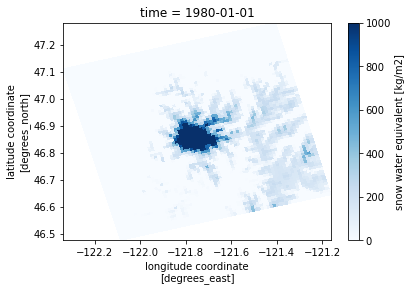

In [25]:
rainier.isel(time=0).swe.plot(x='lon', y='lat', cmap='Blues')

get values only for april 1

In [6]:
rainier_april1 = rainier.sel(time=( (rainier['time.month']==4) & (rainier['time.day']==1) ) )

plot swe

### *Interannual Variability*

Look at april 1 SWE over the 40 year record

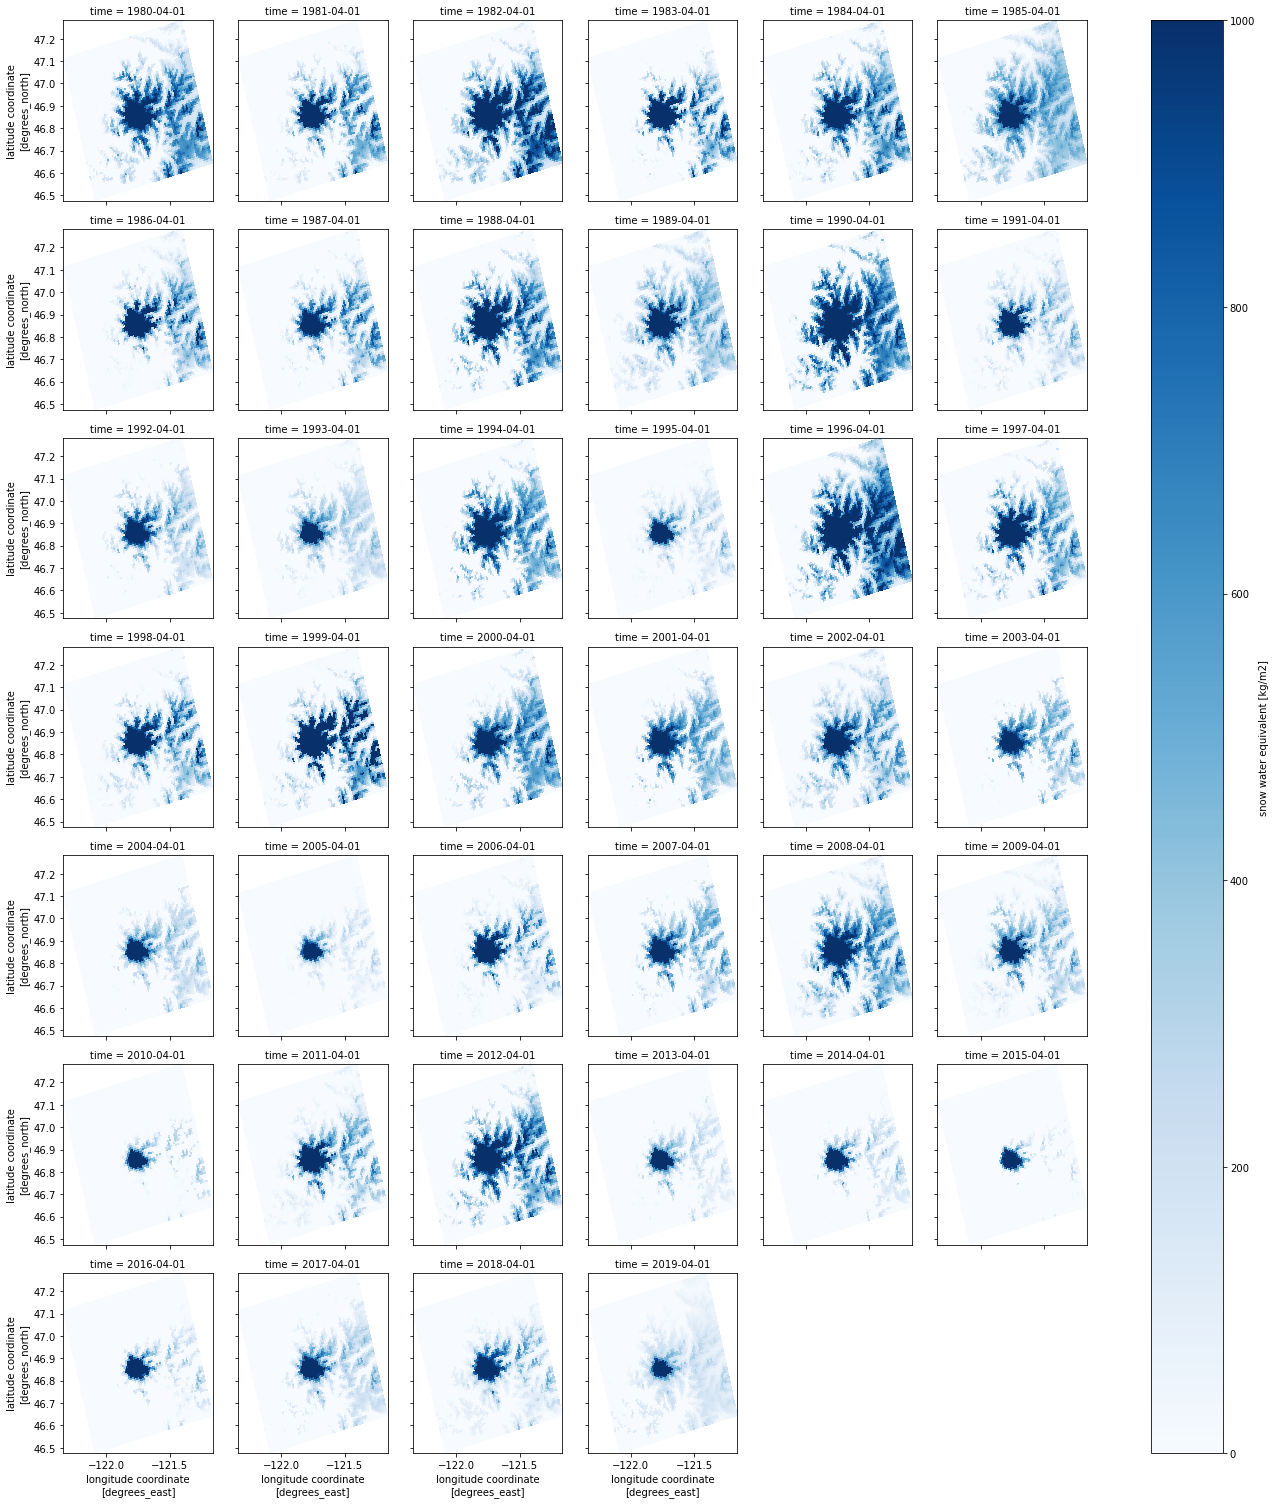

In [9]:
rainier_april1.swe.plot(x='lon', y='lat', col='time', col_wrap=6, cmap='Blues')

Plot timeseries of april 1 mean swe for this region around mt rainier over the 40 year period

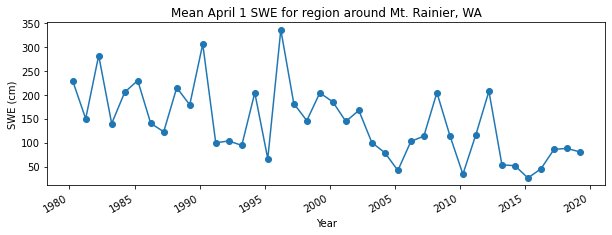

In [19]:
fig, ax = plt.subplots(figsize=(10,3))

rainier_april1.swe.mean(['x','y']).plot(linestyle='-', marker='o', ax=ax)

ax.set_title('Mean April 1 SWE for region around Mt. Rainier, WA');
ax.set_ylabel('SWE (cm)')
ax.set_xlabel('Year');

How does this compare to annual cumulative SWE?

In [32]:
r = rainier.swe.sel(time=(rainier['time.season']=='DJF') )

In [ ]:
r.plot()